In [1]:
import os, sys
sys.path.append("../")
sys.path.append("../../spectral_distortions_perturbations/")
sys.path.append("../../twentyone-global/")

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.lines import Line2D
import matplotlib
from scipy.interpolate import interp1d
from tqdm import *

from grf.grf import FIRAS
from twentyone.twentyone import TwentyOne
from grf.pk_interp import PowerSpectrumGridInterpolator
from decay.units import *
from decay.decay import DecaySpectra

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
plots_dir = '../../spectral_distortions_perturbations/paper/draft-21cm-features/plots/'

## 21-cm and perturbation classes

In [4]:
# Define power spectrum for perturbations treatment
pspec = PowerSpectrumGridInterpolator("franken_lower")
firas = FIRAS(pspec)
spec_dapper = DecaySpectra(pspec)

../../spectral_distortions_perturbations/grf/grf.py:663: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pd.read_table("../data/firas_monopole_spec_v1.txt", skiprows=18, sep="\s+", header=None, names=["freq", "I", "residual", "uncert", "poles"])


## Parameter space scan

In [7]:
m_a_ary = np.logspace(-6, -1, 50) * eV
m_Ap_ary = np.logspace(-14, -9, 50) * eV

ratio_ary_100 = np.zeros((50, 50))
for i in range(len(m_Ap_ary)):
    filename = "/Users/smsharma/cluster_arys/chi2_arys/decay_" + str(i) + "_001.npz"
    if os.path.exists(filename):
        ratio_ary_100[i,:] = np.load(filename)['ratio_ary']
    else:
        continue
    
ratio_ary_100 = ratio_ary_100

In [8]:
z_res = np.array([spec_dapper.get_z_crossings(m_Ap, firas.omega_FIRAS[0])[-1] for m_Ap in m_Ap_ary])

z_end = 17.
m_a_end = (1 + z_res) / (z_end + 1) * spec_dapper.omega_21 * 2

In [9]:
lim_arcade_ary = np.zeros(len(ratio_ary_100))

for i_m in range(len(m_Ap_ary)):

    TS_eps_ary = np.nan_to_num(ratio_ary_100[i_m], nan=1e10)

    # Find value, location and xsec at the max TS (as a function of mass)
    max_loc = np.argmax(TS_eps_ary)
    max_TS = TS_eps_ary[max_loc]

    # Calculate limit
    for xi in range(max_loc, len(m_a_ary)):
        val = TS_eps_ary[xi]
        if val < 10.:
            scale = (-TS_eps_ary[xi - 1] + 2.) / (-TS_eps_ary[xi - 1] + TS_eps_ary[xi])
            lim_arcade_ary[i_m] = 10 ** (np.log10(m_a_ary[xi - 1]) + scale * (np.log10(m_a_ary[xi]) - np.log10(m_a_ary[xi - 1])))
            break
            
lim_arcade_ary[lim_arcade_ary == 0] = 1.
lim_arcade_ary[lim_arcade_ary < m_a_end] = 0.

In [10]:
ratio_ary_100 = np.zeros((50, 50))
for i in range(len(m_Ap_ary)):
    filename = "/Users/smsharma/cluster_arys/chi2_arys/decay_" + str(i) + "_100.npz"
    if os.path.exists(filename):
        ratio_ary_100[i,:] = np.load(filename)['ratio_ary']
    else:
        continue
    
ratio_ary_100 = ratio_ary_100

In [11]:
lim_stellar_ary = np.zeros(len(ratio_ary_100))

for i_m in range(len(m_Ap_ary)):

    TS_eps_ary = np.nan_to_num(ratio_ary_100[i_m], nan=1e10)

    # Find value, location and xsec at the max TS (as a function of mass)
    max_loc = np.argmax(TS_eps_ary)
    max_TS = TS_eps_ary[max_loc]

    # Calculate limit
    for xi in range(0, len(m_a_ary)):
        val = TS_eps_ary[xi]
        if val > 10.:
            scale = (-TS_eps_ary[xi - 1] + 2.) / (-TS_eps_ary[xi - 1] + TS_eps_ary[xi])
            lim_stellar_ary[i_m] = 10 ** (np.log10(m_a_ary[xi - 1]) + scale * (np.log10(m_a_ary[xi]) - np.log10(m_a_ary[xi - 1])))
            break
            
lim_stellar_ary[lim_stellar_ary == 0] = 1.
lim_stellar_ary[lim_stellar_ary < m_a_end] = 0.

In [12]:
ratio_ary_100 = np.zeros((50, 50))
for i in range(len(m_Ap_ary)):
    filename = "/Users/smsharma/cluster_arys/chi2_arys/decay_" + str(i) + "_010.npz"
    if os.path.exists(filename):
        ratio_ary_100[i,:] = np.load(filename)['ratio_ary']
    else:
        continue
    
ratio_ary_100 = ratio_ary_100

No handles with labels found to put in legend.


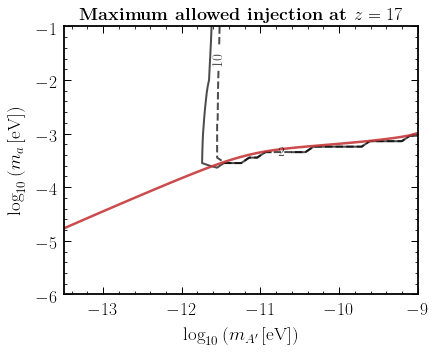

In [26]:
# mpl.rcParams['figure.figsize'] = 7.5, 5.5

ratio_ary_trans = np.transpose(ratio_ary_100)

levels = [2, 10.]
X, Y = np.meshgrid(np.log10(m_Ap_ary / eV), np.log10(m_a_ary / eV))

fig, ax = plt.subplots()

CS = ax.contour(X, Y, ratio_ary_trans, levels = levels, linestyles=['-','--'], colors='k', linewidths=2, alpha=0.7)

fmt = {}
strs = ['2', '10']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
    
# im = ax.imshow((ratio_ary_trans), cmap = 'YlGn', aspect='auto', origin='lower', extent=[-14, -9, -5, -1], vmin=1, vmax=10)

ax.clabel(CS, fmt=fmt,inline=1, fontsize=14)
ax.plot(np.log10(m_Ap_ary / eV), np.log10(m_a_end / eV))
# ax.plot(np.log10(m_A_ary / eV), np.log10(m_a_EDGES_ary / eV), color='blue', label='$z_\mathrm{end} = 15$')

# cbar = fig.colorbar(im)
# cbar.set_label(r'$\log_{10}(T_A^{\mathrm{max}} / T_{\mathrm{CMB}})_{z=17}$')

ax.set_xlabel('$\log_{10}\,(m_{A^\prime}\,[\mathrm{eV}])$')
ax.set_ylabel('$\log_{10}\,(m_a\,[\mathrm{eV}])$')

ax.set_xlim(-13.5, -9)
ax.set_ylim(-6, -1)

plt.legend(loc='lower right', ncol=2)

plt.title(r"\bf{Maximum allowed injection at $z=17$}")

plt.tight_layout()


In [33]:
m_radio, lim_radio

(array([-11.62113709, -11.62363947, -11.62644156, -11.62951747,
        -11.63282351, -11.6363002 , -11.63987659, -11.64347615,
        -11.64702325, -11.65044893, -11.65306122, -11.65605924,
        -11.67035184, -11.68122812, -11.68921704, -11.69679832,
        -11.70383354, -11.71022681, -11.71592576, -11.72091765,
        -11.7264739 , -11.73081454, -11.73379441, -11.7362731 ,
        -11.73831708, -11.73999036, -11.74135194]),
 array([-1.        , -1.10204082, -1.20408163, -1.30612245, -1.40816327,
        -1.51020408, -1.6122449 , -1.71428571, -1.81632653, -1.91836735,
        -1.99929543, -2.02040816, -2.12244898, -2.2244898 , -2.32653061,
        -2.42857143, -2.53061224, -2.63265306, -2.73469388, -2.83673469,
        -2.93877551, -3.04081633, -3.14285714, -3.24489796, -3.34693878,
        -3.44897959, -3.55102041]))

(-6.0, -1.0)

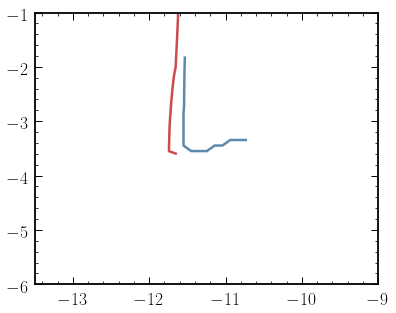

In [41]:
m_radio, lim_radio = np.transpose((CS.collections[0].get_paths()[0].vertices)[:-11])

plt.plot(m_radio, lim_radio)


m_radio, lim_radio = np.transpose((CS.collections[1].get_paths()[1].vertices)[:-20])

plt.plot(m_radio, lim_radio)

plt.xlim(-13.5, -9)
plt.ylim(-6, -1)


In [15]:
m_Ap_fine_ary = np.logspace(-14, np.max(m_radio), 20000) * eV
z_res = np.array([spec_dapper.get_z_crossings(m_Ap, firas.omega_FIRAS[0])[-1] for m_Ap in m_Ap_fine_ary])

z_end = 17.
m_a_fine_end = (1 + z_res) / (z_end + 1) * spec_dapper.omega_21 * 2

In [16]:
lim_radio_interp = interp1d(m_radio, lim_radio, bounds_error=False)(np.log10(m_Ap_fine_ary / eV))

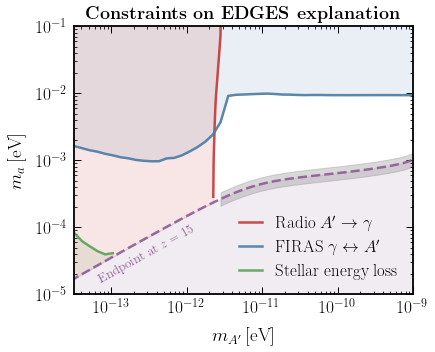

In [257]:
# m_radio, lim_radio = np.transpose([[-11.61534244,  -1.        ],
#        [-11.61709444,  -1.10204082],
#        [-11.61925016,  -1.20408163],
#        [-11.62161559,  -1.30612245],
#        [-11.62415657,  -1.40816327],
#        [-11.62682733,  -1.51020408],
#        [-11.62957337,  -1.6122449 ],
#        [-11.63233609,  -1.71428571],
#        [-11.63505762,  -1.81632653],
#        [-11.63768525,  -1.91836735],
#        [-11.64017461,  -2.02040816],
#        [-11.64244807,  -2.12244898],
#        [-11.64421321,  -2.2244898 ],
#        [-11.64554981,  -2.32653061],
#        [-11.64677875,  -2.42857143],
#        [-11.64791921,  -2.53061224],
#        [-11.64896183,  -2.63265306],
#        [-11.65107244,  -2.73469388],
#        [-11.65283401,  -2.83673469],
#        [-11.65306122,  -2.92638765],
#        [-11.65432389,  -2.93877551],
#        [-11.65936234,  -3.04081633],
#        [-11.66308567,  -3.14285714],
#        [-11.66618721,  -3.24489796],
#        [-11.66875328,  -3.34693878],
#        [-11.66996249,  -3.44897959],
#        [-11.65306122,  -3.52350079],
#        [-11.65204628,  -3.55102041]])

lim_stellar_ary[m_Ap_ary / eV > 1.2e-13] = np.nan #m_a_end[m_Ap_ary / eV > 1.5e-13]

fig, ax = plt.subplots()

ax.plot(m_Ap_fine_ary / eV, 10 ** lim_radio_interp, label=r"Radio $A'\rightarrow\gamma$", color=cols_default[0])
# ax.plot(10 ** m_radio, 10 ** lim_radio, label=r"Radio $A'\rightarrow\gamma$", color=cols_default[0])
ax.plot(m_Ap_ary / eV, lim_arcade_ary / eV, label=r"FIRAS $\gamma\leftrightarrow A'$", color=cols_default[1])
ax.plot(m_Ap_ary[m_Ap_ary / eV < 3e-13] / eV, lim_stellar_ary[m_Ap_ary / eV < 3e-13] / eV, label=r"Stellar energy loss", color=cols_default[2])
ax.plot(m_Ap_ary / eV, m_a_end / eV, ls='--', color=cols_default[3])

ax.fill_between(m_Ap_ary / eV, lim_arcade_ary / eV, np.ones_like(lim_arcade_ary), color=cols_default[1], alpha=0.12)
ax.fill_between(m_Ap_ary / eV, lim_stellar_ary / eV, m_a_end / eV, color=cols_default[2], alpha=0.12)
ax.fill_between(m_Ap_ary / eV, m_a_end / eV, 1e-8 * np.ones_like(m_a_end / eV), color=cols_default[3], alpha=0.12)

mean_radio = np.min(10 ** m_radio)
offset = 0
# ax.fill_between(m_Ap_ary[m_Ap_ary / eV < mean_radio - offset] / eV, m_a_end[m_Ap_ary / eV < mean_radio - offset] / eV, np.ones_like(m_a_end[m_Ap_ary / eV < mean_radio - offset]) / eV, color=cols_default[0], alpha=0.12)
# ax.fill_between(10 ** m_radio, 10 ** lim_radio, np.ones_like(10 ** lim_radio), color=cols_default[0], alpha=0.12)
# ax.fill_between(m_Ap_fine_ary / eV, 10 ** lim_radio_interp, np.ones_like(10 ** lim_radio_interp), color=cols_default[0], alpha=0.12)

fill_lower = np.max([m_a_fine_end / eV, np.nan_to_num(10 ** lim_radio_interp)], axis=0)
ax.fill_between(m_Ap_fine_ary / eV, fill_lower, np.ones_like(10 ** lim_radio_interp), color=cols_default[0], alpha=0.12)



ax.fill_between(m_Ap_ary[m_Ap_ary / eV > mean_radio] / eV, 10 ** (np.log10(m_a_end[m_Ap_ary / eV > mean_radio] / eV) - 0.1), 10 ** (np.log10(m_a_end[m_Ap_ary / eV > mean_radio] / eV) + 0.1), color='grey', alpha=0.3)

ax.set_xlabel('$m_{A^\prime}\,[\mathrm{eV}]$')
ax.set_ylabel('$m_a\,[\mathrm{eV}]$')

ax.set_xlim(10 ** -13.5, 10 ** -9)
ax.set_ylim(10 ** -5, 10 ** -1)

ax.set_xscale("log")
ax.set_yscale("log")

ax.text(6.3e-14, 1.5e-5, 'Endpoint at $z=15$', rotation=29, fontsize=13, color=cols_default[3])
# ax.text(1e-11, 1e-4, 'Can explain EDGES \n amplitude and upturn', rotation=6, fontsize=13, color='black')

ax.legend(handlelength=1.3)

plt.title(r"\bf{Constraints on EDGES explanation}")
plt.tight_layout()

# plt.savefig(plots_dir + "EDGES_param.pdf")
plt.savefig("/Users/smsharma/Desktop/EDGES_param.pdf")

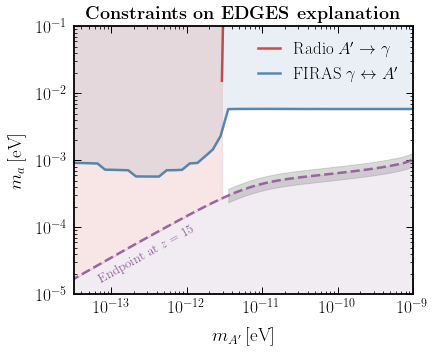

In [25]:
# m_radio, lim_radio = np.transpose([[-11.61534244,  -1.        ],
#        [-11.61709444,  -1.10204082],
#        [-11.61925016,  -1.20408163],
#        [-11.62161559,  -1.30612245],
#        [-11.62415657,  -1.40816327],
#        [-11.62682733,  -1.51020408],
#        [-11.62957337,  -1.6122449 ],
#        [-11.63233609,  -1.71428571],
#        [-11.63505762,  -1.81632653],
#        [-11.63768525,  -1.91836735],
#        [-11.64017461,  -2.02040816],
#        [-11.64244807,  -2.12244898],
#        [-11.64421321,  -2.2244898 ],
#        [-11.64554981,  -2.32653061],
#        [-11.64677875,  -2.42857143],
#        [-11.64791921,  -2.53061224],
#        [-11.64896183,  -2.63265306],
#        [-11.65107244,  -2.73469388],
#        [-11.65283401,  -2.83673469],
#        [-11.65306122,  -2.92638765],
#        [-11.65432389,  -2.93877551],
#        [-11.65936234,  -3.04081633],
#        [-11.66308567,  -3.14285714],
#        [-11.66618721,  -3.24489796],
#        [-11.66875328,  -3.34693878],
#        [-11.66996249,  -3.44897959],
#        [-11.65306122,  -3.52350079],
#        [-11.65204628,  -3.55102041]])

# lim_stellar_ary[m_Ap_ary / eV > 1.2e-13] = np.nan #m_a_end[m_Ap_ary / eV > 1.5e-13]

fig, ax = plt.subplots()

ax.plot(m_Ap_fine_ary / eV, 10 ** lim_radio_interp, label=r"Radio $A'\rightarrow\gamma$", color=cols_default[0])
# ax.plot(10 ** m_radio, 10 ** lim_radio, label=r"Radio $A'\rightarrow\gamma$", color=cols_default[0])
ax.plot(m_Ap_ary / eV, lim_arcade_ary / eV, label=r"FIRAS $\gamma\leftrightarrow A'$", color=cols_default[1])
# ax.plot(m_Ap_ary[m_Ap_ary / eV < 3e-13] / eV, lim_stellar_ary[m_Ap_ary / eV < 3e-13] / eV, label=r"Stellar energy loss", color=cols_default[2])
ax.plot(m_Ap_ary / eV, m_a_end / eV, ls='--', color=cols_default[3])

ax.fill_between(m_Ap_ary / eV, lim_arcade_ary / eV, np.ones_like(lim_arcade_ary), color=cols_default[1], alpha=0.12)
# ax.fill_between(m_Ap_ary / eV, lim_stellar_ary / eV, m_a_end / eV, color=cols_default[2], alpha=0.12)
ax.fill_between(m_Ap_ary / eV, m_a_end / eV, 1e-8 * np.ones_like(m_a_end / eV), color=cols_default[3], alpha=0.12)

mean_radio = np.min(10 ** m_radio)
offset = 0
# ax.fill_between(m_Ap_ary[m_Ap_ary / eV < mean_radio - offset] / eV, m_a_end[m_Ap_ary / eV < mean_radio - offset] / eV, np.ones_like(m_a_end[m_Ap_ary / eV < mean_radio - offset]) / eV, color=cols_default[0], alpha=0.12)
# ax.fill_between(10 ** m_radio, 10 ** lim_radio, np.ones_like(10 ** lim_radio), color=cols_default[0], alpha=0.12)
# ax.fill_between(m_Ap_fine_ary / eV, 10 ** lim_radio_interp, np.ones_like(10 ** lim_radio_interp), color=cols_default[0], alpha=0.12)

fill_lower = np.max([m_a_fine_end / eV, np.nan_to_num(10 ** lim_radio_interp)], axis=0)
ax.fill_between(m_Ap_fine_ary / eV, fill_lower, np.ones_like(10 ** lim_radio_interp), color=cols_default[0], alpha=0.12)

ax.clabel(CS, fmt=fmt,inline=1, fontsize=14)


ax.fill_between(m_Ap_ary[m_Ap_ary / eV > mean_radio] / eV, 10 ** (np.log10(m_a_end[m_Ap_ary / eV > mean_radio] / eV) - 0.1), 10 ** (np.log10(m_a_end[m_Ap_ary / eV > mean_radio] / eV) + 0.1), color='grey', alpha=0.3)

ax.set_xlabel('$m_{A^\prime}\,[\mathrm{eV}]$')
ax.set_ylabel('$m_a\,[\mathrm{eV}]$')

ax.set_xlim(10 ** -13.5, 10 ** -9)
ax.set_ylim(10 ** -5, 10 ** -1)

ax.set_xscale("log")
ax.set_yscale("log")

ax.text(6.3e-14, 1.5e-5, 'Endpoint at $z=15$', rotation=29, fontsize=13, color=cols_default[3])
# ax.text(1e-11, 1e-4, 'Can explain EDGES \n amplitude and upturn', rotation=6, fontsize=13, color='black')

ax.legend(handlelength=1.3)

plt.title(r"\bf{Constraints on EDGES explanation}")
plt.tight_layout()

# plt.savefig(plots_dir + "EDGES_param.pdf")
# plt.savefig("/Users/smsharma/Desktop/EDGES_param.pdf")